In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from label_flip_revised.utils import create_dir

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/label_flip_revised


In [3]:
# NOTE: `cardiotocography` is removed!

datanames = [
    'abalone_subset_std',
    'australian_std',
    'banknote_std',
    'breastcancer_std',
    'cmc_std',
    'htru2_subset_std',
    'phoneme_subset_std',
    'ringnorm_subset_std',
    'texture_subset_std',
    'yeast_subset_std'
]

print(len(datanames))

10


In [4]:
workspace_names = ['label_flip_revised'] + [f'label_flip_revised_{i:02d}' for i in range(2, 6)]
workspace_names

['label_flip_revised',
 'label_flip_revised_02',
 'label_flip_revised_03',
 'label_flip_revised_04',
 'label_flip_revised_05']

In [5]:
path_scores = np.sort(glob(os.path.join(PATH_ROOT, 'results', 'real', '*.csv')))
print(len(path_scores))
print(path_scores)

40
['/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_nn_flfa_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_nn_random_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_svm_alfa_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_svm_random_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/australian_std_nn_flfa_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/australian_std_nn_random_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/australian_std_svm_alfa_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/australian_std_svm_random_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/banknote_std_nn_flfa_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/banknote_std_nn_random_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/banknote_std_sv

In [6]:
path_output = os.path.join(PATH_ROOT, 'results', 'real_group')
create_dir(path_output)

for path_score in path_scores:
    filename = os.path.basename(path_score)
    dfs = []
    for workspace in workspace_names:
        dfs.append(pd.read_csv(os.path.join(PATH_ROOT.parent, workspace, 'results', 'real', filename)))
    df = pd.concat(dfs)
    df = df.groupby('rate').mean()

    df.to_csv(os.path.join(path_output, filename))

In [7]:
colors = {
    'svm-alfa': '#ffa000',
    'svm-random': '#388e3c',
    'nn-flfa': '#d32f2f',
    'nn-random': '#1976d2',
}

In [8]:
def draw_subplot(path_scores, dataname, ax):
    df_nn_flfa = pd.read_csv(path_scores[0])
    df_nn_random = pd.read_csv(path_scores[1])
    df_svm_alfa = pd.read_csv(path_scores[2])
    df_svm_random = pd.read_csv(path_scores[3])

    df_nn_flfa = df_nn_flfa * 100
    df_nn_random = df_nn_random * 100
    df_svm_alfa = df_svm_alfa * 100
    df_svm_random = df_svm_random * 100

    # df_svm_alfa.plot(x='rate', y='train', ax=ax, style='--', marker='.', color=colors['svm-alfa'])
    # df_svm_alfa.plot(x='rate', y='test', ax=ax, marker='.', color=colors['svm-alfa'])

    # df_svm_random.plot(x='rate', y='train', ax=ax, style='--', marker='.', color=colors['svm-random'])
    # df_svm_random.plot(x='rate', y='test', ax=ax, marker='.', color=colors['svm-random'])

    df_nn_flfa.plot(x='rate', y='train', ax=ax, style='--', marker='.', color=colors['nn-flfa'])
    df_nn_flfa.plot(x='rate', y='test', ax=ax, marker='.', color=colors['nn-flfa'])

    df_nn_random.plot(x='rate', y='train', ax=ax, style='--', marker='.', color=colors['nn-random'])
    df_nn_random.plot(x='rate', y='test', ax=ax, marker='.', color=colors['nn-random'])

    ax.set(xlim=[-1, 41], ylim=[29, 105])
    ax.set_title(dataname)
    ax.set_xlabel('Noise Label Level (%)')
    ax.set_ylabel('Accuracy (%)')

    ax.get_legend().remove()

In [9]:
titlenames = [
    'Abalone',
    'Australian',
    'Banknote',
    'Breastcancer',
    'CMC',
    'HTRU2',
    'Phoneme',
    'Ringnorm',
    'Texture',
    'Yeast'
]

fontsize = 13

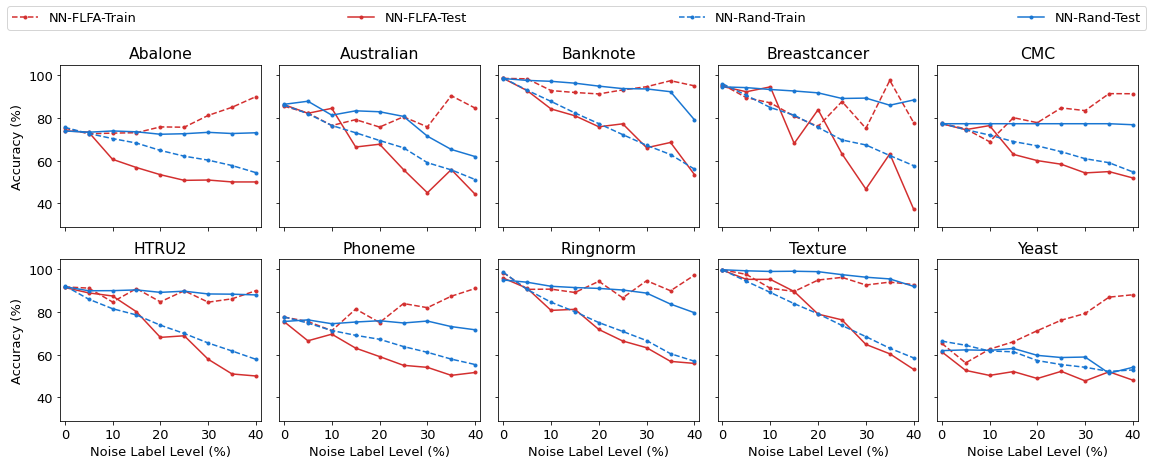

In [16]:
path_scores = np.sort(glob(os.path.join(path_output, '*.csv')))

plt.rcParams["font.size"] = fontsize
fig, axs = plt.subplots(2, 5, sharey=True, sharex=True, figsize=(16, 6))
_axs = []
for i in range(2):
    for j in range(5):
        _axs.append(axs[i, j])
for dataname, title, ax in zip(datanames, titlenames, _axs):
    draw_subplot([ps for ps in path_scores if dataname in ps], title, ax)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
labels = [
    # 'SVM-ALFA-Train',
    # 'SVM-ALFA-Test',
    # 'SVM-Random-Train',
    # 'SVM-Random-Test',
    'NN-FLFA-Train',
    'NN-FLFA-Test',
    'NN-Rand-Train',
    'NN-Rand-Test',
]
fig.legend(lines, labels, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=4)

plt.tight_layout(pad=0.8)
path_fig_out = os.path.join(PATH_ROOT, 'results', 'flfa_acc.pdf', )
plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')